In [1]:
import numpy as np
import matplotlib.pyplot as plt
import poppy
import astropy.units as u

from astropy.io import fits
from slicer_generation import *
from surface_solns import *
from custom_slicer_helpers import *

Subpupil mirrors

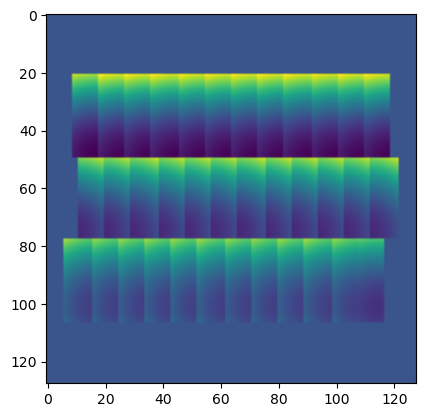

In [151]:
p_custom = load_slice_params_file("p_custom_1.txt")
p = make_image_slicer_params_from_custom(p_custom)

Nsamp = 128
xvals = np.linspace(-20, 20, Nsamp)  # in mm
yvals = np.linspace(-20, 20, Nsamp)

opd = np.zeros((Nsamp, Nsamp))
transmission = np.zeros((Nsamp, Nsamp))

for i, y in enumerate(yvals):
    for j, x in enumerate(xvals):
        opdval = 2 * make_image_slicer(x, y, p, p_custom)
        if np.isnan(opdval):
            opd[i,j] = 0
            transmission[i,j] = 0
        else:
            opd[i,j] = opdval
            transmission[i,j] = 1

# convert mm to meters
opd *= 1e-3
opd_scale = xvals[1] - xvals[0]

plt.figure()
plt.imshow(opd)
plt.show()

In [152]:
fits.writeto('test_opd_0.fits', opd, overwrite=True)
fits.writeto('test_amp_0.fits', transmission, overwrite=True)

mir_subpup = poppy.FITSOpticalElement(
    name='image slicer',
    opd = 'test_opd_0.fits',
    transmission='test_amp_0.fits',  # array = 0–1
    pixelscale=opd_scale,
    opdunits='meters'
)

Image slicer

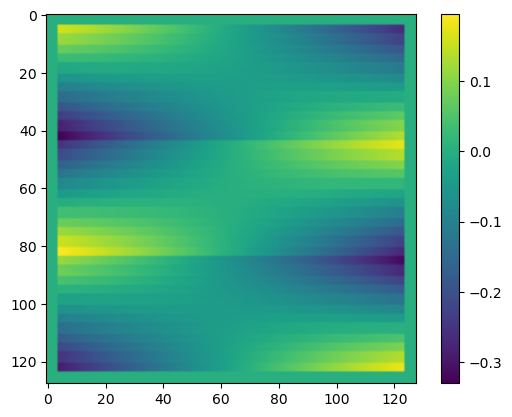

In [153]:
p_custom = load_slice_params_file("p_custom_2.txt")
p = make_image_slicer_params_from_custom(p_custom)

Nsamp = 128
xvals = np.linspace(-3.8, 3.8, Nsamp)  # in arcseconds
yvals = np.linspace(-3.8, 3.8, Nsamp)

sag = np.zeros((Nsamp, Nsamp))

for i, y in enumerate(yvals):
    for j, x in enumerate(xvals):
        sagval = make_image_slicer(x, y, p, p_custom)
        if np.isnan(sagval):
            sag[i,j] = 0
        else:
            sag[i,j] = sagval

plt.figure()
plt.imshow(sag)
plt.colorbar()
plt.show()

# convert to meters
sag *= 1e-3

# Convert sag to radians
wavelength = 2e-6  # meters
phasor = np.exp(1j * 4*np.pi/wavelength * sag)  # factor 2 for reflection

# Create focal-plane optic
pxscale = (xvals[1] - xvals[0]) * u.arcsec / u.pixel
mir_imageslicer = poppy.ArrayOpticalElement(transmission=phasor, pixelscale=pxscale)

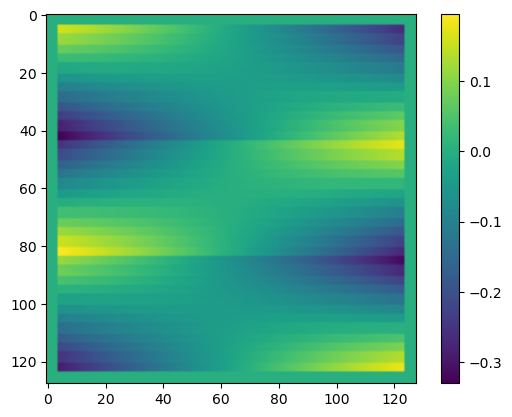

In [215]:
p_custom = load_slice_params_file("p_custom_2.txt")
p = make_image_slicer_params_from_custom(p_custom)

Nsamp = 128
xvals = np.linspace(-3.8, 3.8, Nsamp)  # in arcseconds
yvals = np.linspace(-3.8, 3.8, Nsamp)

sag = np.zeros((Nsamp, Nsamp))

for i, y in enumerate(yvals):
    for j, x in enumerate(xvals):
        sagval = make_image_slicer(x, y, p, p_custom)
        if np.isnan(sagval):
            sag[i,j] = 0
        else:
            sag[i,j] = sagval

plt.figure()
plt.imshow(sag)
plt.colorbar()
plt.show()

# convert to meters
sag *= 1e-3
opd = sag * 2

# Create focal-plane optic
pxscale = (xvals[1] - xvals[0]) * u.arcsec / u.pixel
mir_imageslicer = poppy.ArrayOpticalElement(opd=opd, pixelscale=pxscale)

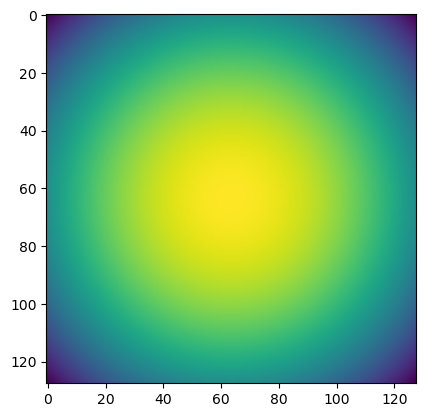

In [243]:
p_custom = load_slice_params_file("p_custom_0.txt")
p = make_image_slicer_params_from_custom(p_custom)

Nsamp = 128
xvals = np.linspace(-3.8, 3.8, Nsamp)  # in mm
yvals = np.linspace(-3.8, 3.8, Nsamp)

opd = np.zeros((Nsamp, Nsamp))
transmission = np.zeros((Nsamp, Nsamp))

for i, y in enumerate(yvals):
    for j, x in enumerate(xvals):
        opdval = 2 * make_image_slicer(x, y, p, p_custom)
        if np.isnan(opdval):
            opd[i,j] = 0
            transmission[i,j] = 0
        else:
            opd[i,j] = opdval
            transmission[i,j] = 1

# convert mm to meters
opd *= 1e-3
opd_scale = xvals[1] - xvals[0]

plt.figure()
plt.imshow(opd)
plt.show()

In [244]:
fits.writeto('test_opd_0.fits', opd, overwrite=True)
fits.writeto('test_amp_0.fits', transmission, overwrite=True)

mir_subpup = poppy.FITSOpticalElement(
    name='image slicer',
    opd = 'test_opd_0.fits',
    transmission='test_amp_0.fits',  # array = 0–1
    pixelscale=opd_scale,
    opdunits='meters'
)

In [261]:
opd_scale

np.float64(0.059842519685039175)

In [259]:
osys = poppy.OpticalSystem()
osys.add_pupil(poppy.CircularAperture(radius=3*u.meter), npix=1024)
osys.add_pupil(mir_subpup)  # focal-plane optic
#osys.add_pupil(poppy.CircularAperture(radius=3*u.meter))
#osys.add_pupil(mir_subpup)
osys.add_detector(pixelscale=0.01*u.arcsec/u.pixel, fov_arcsec=2.0)

psf = osys.calc_psf(wavelength=wavelength)

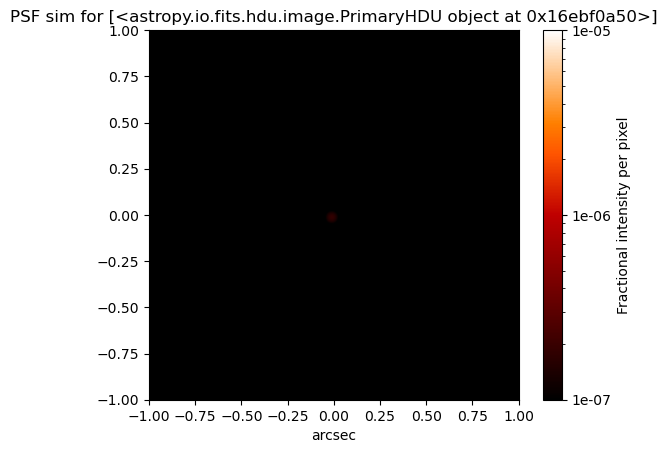

In [260]:
poppy.display_psf(psf, vmax=1e-5)

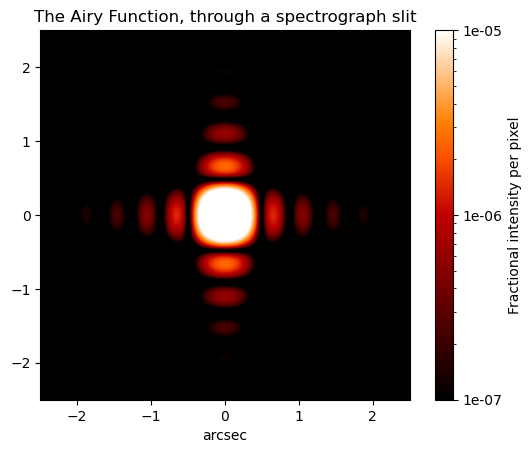

In [7]:
osys = poppy.OpticalSystem()
osys.add_pupil(poppy.CircularAperture(radius=0.5*u.meter))
osys.add_image(poppy.RectangularFieldStop(width=0.5*u.arcsec, height=10*u.arcsec) )
osys.add_pupil(poppy.CircularAperture(radius=1*u.meter))   # reimaged pupil in spectrograph; typically would have a grating here
osys.add_detector(pixelscale=0.010*u.arcsec/u.pixel, fov_arcsec=5.0)

psf = osys.calc_psf(wavelength=2e-6)

poppy.display_psf(psf, title='The Airy Function, through a spectrograph slit', vmax=1e-5, )

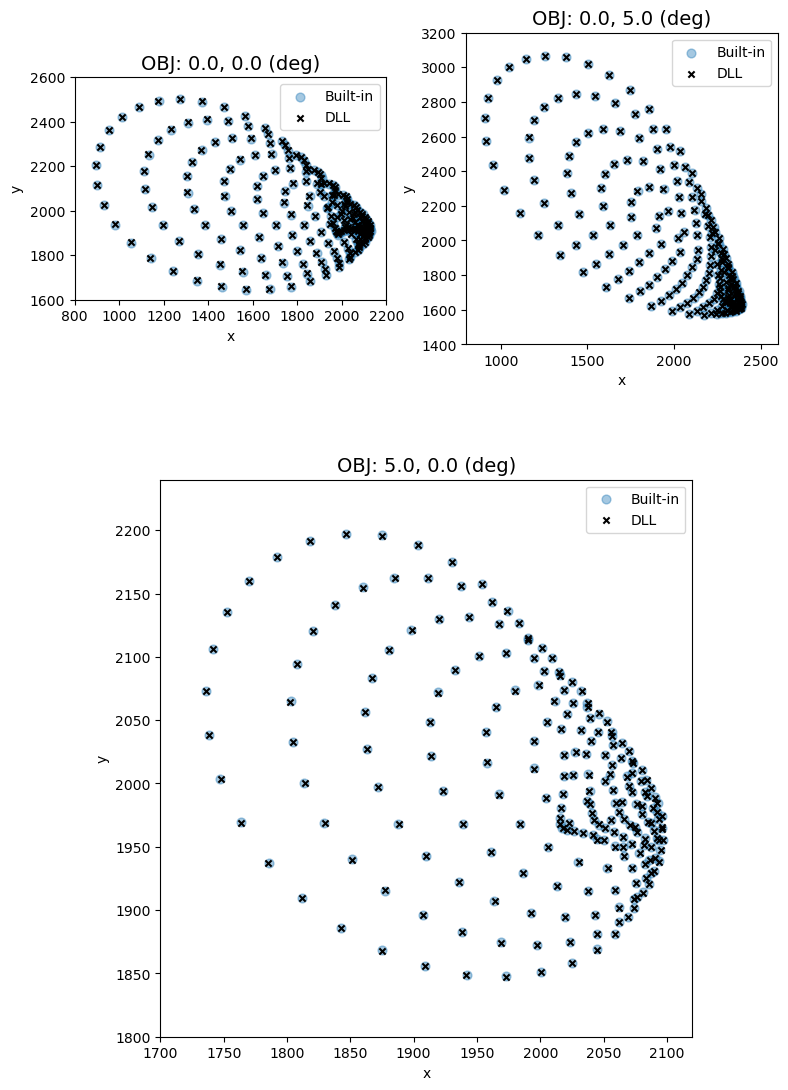

In [60]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Directory containing the CSV files
path_to_files = "/Users/ellenlee/Downloads/spotcompare/"

# Helper function to read x, y columns from a CSV file
def read_xy(filename):
    x, y = [], []
    with open(filename, newline="") as f:
        reader = csv.reader(f)
        for row in reader:
            if not row:
                continue
            x.append(float(row[0]))
            y.append(float(row[1]))
    return x, y

# File name pairs
pairs = [
    ("builtin-1.csv", "dll-1.csv"),
    ("builtin-2.csv", "dll-2.csv"),
    ("builtin-3.csv", "dll-3.csv"),
]

# Create a 2x2 GridSpec; bottom row spans both columns
fig = plt.figure(figsize=(8, 12))
gs = GridSpec(2, 2, figure=fig)

axes = [
    fig.add_subplot(gs[0, 0]),  # top-left
    fig.add_subplot(gs[0, 1]),  # top-right
    fig.add_subplot(gs[1, :])   # bottom, centered (spans both columns)
]

xlims = [
    [2, 5.5],
    [2, 6.5],
    [4.25, 5.3]
]

ylims = [
    [4, 6.5],
    [3.5, 8],
    [4.5, 5.6]
]

xlims = np.array(xlims) * 400
ylims = np.array(ylims) * 400 

angles = [
    [0, 0],
    [0, 5],
    [5, 0]
]

for i, ((builtin_file, dll_file), ax) in enumerate(zip(pairs, axes)):
    bx, by = read_xy(path_to_files + builtin_file)
    dx, dy = read_xy(path_to_files + dll_file)
    if i==0:
        bx = [num - 0.5 for num in bx]
        by = [num + 0.015 for num in by]

    bx = np.array(bx) * 400
    by = np.array(by) * 400
    dx = np.array(dx) * 400
    dy = np.array(dy) * 400

    ax.scatter(bx, by, s=40, label="Built-in", zorder=0, alpha=0.4)
    ax.scatter(dx, dy, s=20, marker='x', c='k', label="DLL", zorder=1)

    ax.set_title(f"OBJ: {angles[i][0]:.1f}, {angles[i][1]:.1f} (deg)", fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_aspect("equal", adjustable="box")  # square plots
    ax.legend()

    ax.set_xlim(xlims[i])
    ax.set_ylim(ylims[i])

for ax in axes:
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


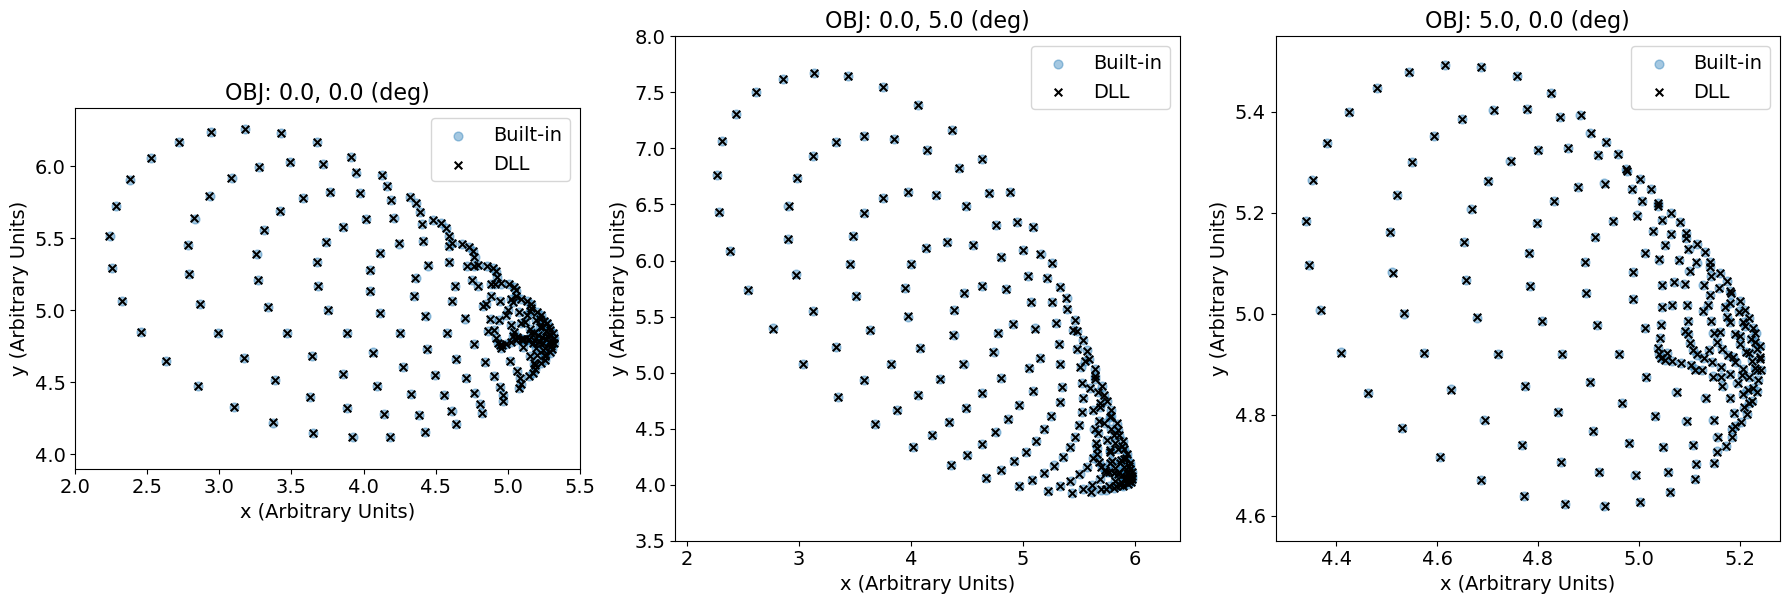

In [92]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Directory containing the CSV files
path_to_files = "/Users/ellenlee/Downloads/spotcompare/"

def read_xy(filename):
    x, y = [], []
    with open(filename, newline="") as f:
        reader = csv.reader(f)
        for row in reader:
            if not row:
                continue
            x.append(float(row[0]))
            y.append(float(row[1]))
    return x, y

# File name pairs
pairs = [
    ("builtin-1.csv", "dll-1.csv"),
    ("builtin-2.csv", "dll-2.csv"),
    ("builtin-3.csv", "dll-3.csv"),
]

# Single row of three plots
fig = plt.figure(figsize=(18, 6))  # wider figure for one row
gs = GridSpec(1, 3, figure=fig)

axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

xlims = [
    [2, 5.5],
    [1.9, 6.4],
    [4.28, 5.28]
]

ylims = [
    [3.9, 6.4],
    [3.5, 8],
    [4.55, 5.55]
]

xlims = np.array(xlims)
ylims = np.array(ylims)

angles = [
    [0, 0],
    [0, 5],
    [5, 0]
]

for i, ((builtin_file, dll_file), ax) in enumerate(zip(pairs, axes)):
    bx, by = read_xy(path_to_files + builtin_file)
    dx, dy = read_xy(path_to_files + dll_file)
    
    if i == 0:
        bx = [num - 0.501 for num in bx]
        by = [num + 0.018 for num in by]

    bx = np.array(bx)
    by = np.array(by)
    dx = np.array(dx)
    dy = np.array(dy)

    ax.scatter(bx, by, s=40, label="Built-in", zorder=0, alpha=0.4)
    ax.scatter(dx, dy, s=30, marker='x', c='k', label="DLL", zorder=1)

    ax.set_title(f"OBJ: {angles[i][0]:.1f}, {angles[i][1]:.1f} (deg)", fontsize=16)
    ax.set_xlabel("x (Arbitrary Units)", fontsize=14)
    ax.set_ylabel("y (Arbitrary Units)", fontsize=14)
    
    ax.set_xlim(xlims[i])
    ax.set_ylim(ylims[i])

    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)
    
    # Set equal scaling **after** limits
    ax.set_aspect('equal', adjustable='box')
    ax.legend(fontsize=14)

plt.tight_layout()
plt.savefig("/Users/ellenlee/Documents/spotcompare.pdf", dpi=300, facecolor="white")
plt.show()
